# Análisis de Encuesta

Este notebook contiene el análisis de las respuestas obtenidas del formulario.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)


## Tipo de distribuccion 


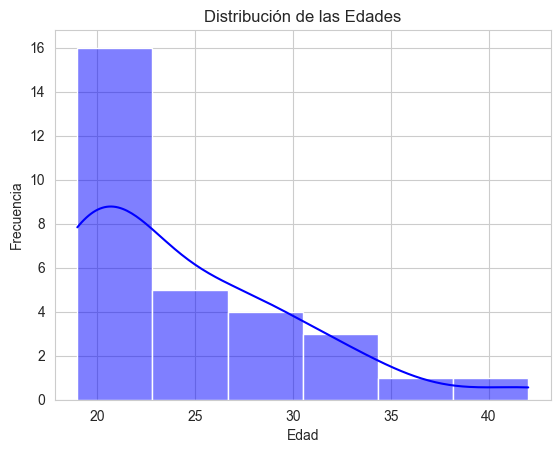

In [117]:


# Histograma con curva de densidad
sns.histplot(df['Edad'], kde=True, color='blue')
plt.title('Distribución de las Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


La gráfica representa la distribución de las edades de los estudiantes y muestra una asimetría positiva, donde la mayor parte de los datos están concentrados en el rango de 20 a 25 años, con un claro pico en este intervalo. A medida que las edades aumentan, la frecuencia disminuye gradualmente, formando una cola larga hacia la derecha, lo que indica que hay pocos participantes en los rangos superiores de edad (30-40 años). Esta forma de **distribución no es normal**, ya que carece de la simetría característica de una campana, y podría clasificarse como una **distribución sesgada positivamente**. La concentración de datos en valores bajos y la dispersión hacia edades mayores sugieren que el grupo analizado está compuesto principalmente por jóvenes, mientras que las edades mayores son casos más aislados.

## Sección 1
### Problema 1: Clasificación por género

Frecuencia por género:
Genero
Hombre    22
Mujer      8
Name: count, dtype: int64

Porcentajes por género:
Genero
Hombre    73.333333
Mujer     26.666667
Name: count, dtype: float64


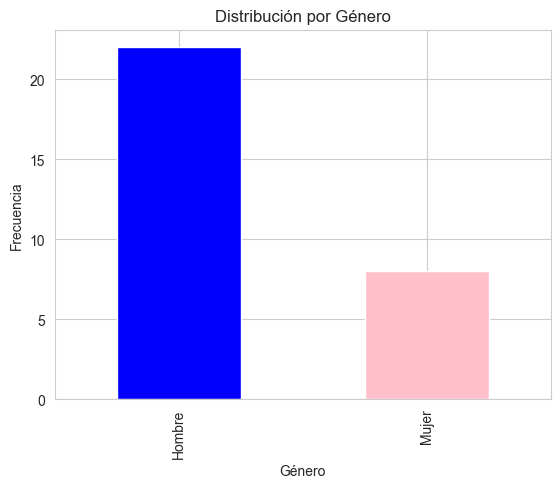

In [118]:

# Clasificar respuestas por género
genero_counts = df['Genero'].value_counts()
genero_porcentaje = (genero_counts / genero_counts.sum()) * 100

# Mostrar resultados
print("Frecuencia por género:")
print(genero_counts)
print("\nPorcentajes por género:")
print(genero_porcentaje)
# Crear histograma de género
genero_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación de los resultados**: La muestra está compuesta mayoritariamente por hombres (73.33%) y en menor medida por mujeres (26.67%). Esto sugiere que los hombres participaron casi tres veces más que las mujeres en la encuesta. Es importante tener en cuenta esta distribución al analizar los resultados globales, ya que podría influir en las conclusiones finales. Si se busca representatividad equitativa, podría ser necesario realizar esfuerzos adicionales para aumentar la participación de las mujeres en encuestas futuras.

### Problema 2: Tabla de frecuencias agrupadas para edades

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta_excel = 'Respuestas.xlsx'  # Cambia esta ruta si el archivo no está en el mismo directorio
datos = pd.read_excel(ruta_excel)

# Filtrar solo la columna de edad
edades = datos["Edad"]

# Crear intervalos de clase con una amplitud de 5 años
rango_min = edades.min()
rango_max = edades.max()
amplitud = 5

intervalos = pd.interval_range(
    start=rango_min - (rango_min % amplitud), 
    end=rango_max + amplitud, 
    freq=amplitud, 
    closed='left'
)

# Calcular frecuencias
frecuencias = pd.cut(edades, bins=intervalos).value_counts(sort=False)

# Obtener límites e información
limites_inferiores = [interval.left for interval in frecuencias.index.categories]
limites_superiores = [interval.right for interval in frecuencias.index.categories]
puntos_medios = [(li + ls) / 2 for li, ls in zip(limites_inferiores, limites_superiores)]
frecuencia_absoluta = frecuencias.values
frecuencia_relativa = frecuencia_absoluta / sum(frecuencia_absoluta)
porcentajes = frecuencia_relativa * 100

# Crear la tabla
tabla_frecuencias = pd.DataFrame({
    "LI (Límite Inferior)": limites_inferiores,
    "LS (Límite Superior)": limites_superiores,
    "xi (Punto Medio)": puntos_medios,
    "Frecuencia Absoluta": frecuencia_absoluta,
    "Frecuencia Relativa": frecuencia_relativa.round(2),
    "%": porcentajes.round(1)
})

# Agregar totales
fila_total = {
    "LI (Límite Inferior)": "Total",
    "LS (Límite Superior)": "",
    "xi (Punto Medio)": "",
    "Frecuencia Absoluta": sum(frecuencia_absoluta),
    "Frecuencia Relativa": sum(frecuencia_relativa).round(2),
    "%": porcentajes.sum().round(1)
}
tabla_frecuencias = pd.concat([tabla_frecuencias, pd.DataFrame([fila_total])], ignore_index=True)

# Mostrar la tabla con estilo Excel
tabla_frecuencias.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody tr', 'props': [('text-align', 'center')]}
]).set_caption("Tabla de Frecuencias")


,LI (Límite Inferior),LS (Límite Superior),xi (Punto Medio),Frecuencia Absoluta,Frecuencia Relativa,%
0,15,20,17.500000,5,0.170000,16.700000
1,20,25,22.500000,13,0.430000,43.300000
2,25,30,27.500000,7,0.230000,23.300000
3,30,35,32.500000,3,0.100000,10.000000
4,35,40,37.500000,1,0.030000,3.300000
5,40,45,42.500000,1,0.030000,3.300000
6,Total,,,30,1.000000,100.000000


**Interpretación de los resultados**: La distribución muestra una participación mayoritaria de personas entre 20 y 25 años, lo cual podría estar relacionado con el público objetivo de la encuesta o el canal por el cual se recolectaron los datos. Los extremos de la distribución (rangos de 15 a 20 años y 40 a 45 años) tienen una representación significativamente menor, lo cual puede indicar un alcance limitado en estas edades o una menor predisposición a participar.

Esta información puede ser utilizada para diseñar estrategias más inclusivas en futuras encuestas, garantizando una representación más uniforme en todos los rangos de edad.



## Sección 2
### Problema 1: Gráfico circular sobre aplicaciones de Blockchain

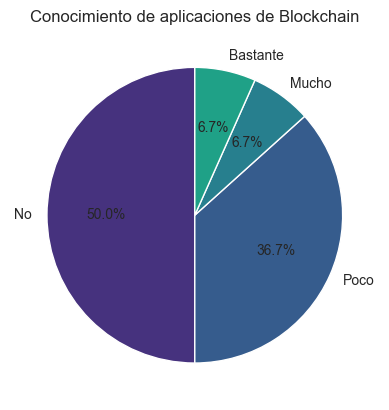

In [120]:


# Gráfico circular para '¿Conoces las aplicaciones de Blockchain?'
respuestas = df['¿Conoces las aplicaciones de Blockchain en sistemas computacionales? '].value_counts()
respuestas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Conocimiento de aplicaciones de Blockchain")
plt.ylabel("")
plt.show()


**Interpretación de los resultados**: Los resultados revelan que la mayoría de los participantes (86.7%) tienen poco o ningún conocimiento sobre aplicaciones de Blockchain. Esto indica que el Blockchain es un tema poco conocido entre los encuestados y que existe una gran oportunidad para la educación y difusión en esta área. Solo el 13.4% de los participantes afirmaron tener un conocimiento considerable o avanzado, lo que puede sugerir que este tema aún está en una etapa inicial de adopción dentro del grupo encuestado.

Este análisis es valioso para identificar lagunas de conocimiento y diseñar estrategias de capacitación enfocadas en aumentar el entendimiento y las habilidades en Blockchain entre los participantes.

### Problema 2: Media, mediana y moda de las edades

Media: 24.37
Mediana: 22.0
Moda: 20


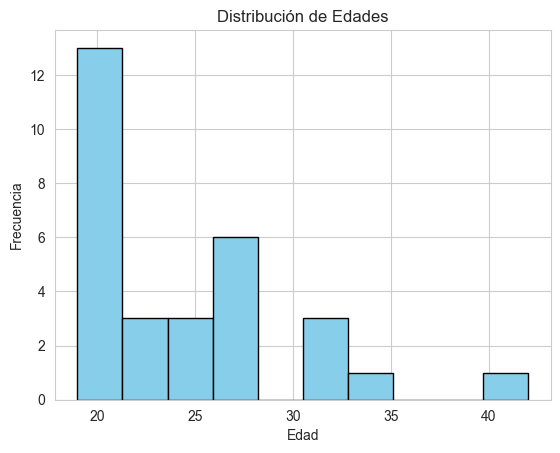

In [121]:

# Calcular medidas de tendencia central
media_edad = df['Edad'].mean()
mediana_edad = df['Edad'].median()
moda_edad = df['Edad'].mode()[0]

# Mostrar resultados
print(f"Media: {media_edad:.2f}")
print(f"Mediana: {mediana_edad}")
print(f"Moda: {moda_edad}")
# Crear histograma de edades
df['Edad'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación de los resultados**: Los resultados sugieren que la distribución de edades está ligeramente sesgada hacia los grupos más jóvenes, con una moda de 20 años y una mediana cercana (22 años). La media, ligeramente mayor (24.37 años), sugiere que hay algunas edades más altas que están elevando el promedio. Estos datos indican que el grupo de participantes está compuesto mayoritariamente por jóvenes adultos, lo que puede influir en las tendencias observadas en las respuestas de otros análisis.


## Sección 3
### Problema 1: Desviación estándar de las edades

In [122]:
# Calcular desviación estándar
desviacion_edad = df['Edad'].std().round(3)
print(f"Desviación estándar: {desviacion_edad}")


Desviación estándar: 5.72


**Interpretación de los resultados**: La desviación estándar de 5.72 sugiere que las edades de los participantes están algo dispersas en torno a la media (24.37 años). Aunque hay cierta variabilidad, los valores no están extremadamente alejados del promedio, lo que indica una distribución relativamente homogénea en términos de edad.


### Problema 2: Rango de edades

In [123]:

# Calcular rango
rango_edad = df['Edad'].max() - df['Edad'].min()
print(f"Rango de edades: {rango_edad}")


Rango de edades: 23


**Interpretación de los resultados**: El rango indica que la diferencia entre la edad más joven y la más vieja es de 23 años. Esto sugiere que el grupo de participantes es bastante diverso en términos de edad, aunque la mayoría de los participantes están concentrados en un rango más joven, como lo indican los análisis de mediana, moda y frecuencia.

### Problema 3: Modele la distribución de las edades usando chebyshev

Para k=1.5:
  Límites: 15.79 a 32.95
  Proporción mínima según Chebyshev: 55.56%

Para k=2:
  Límites: 12.93 a 35.81
  Proporción mínima según Chebyshev: 75.00%

Para k=3:
  Límites: 7.21 a 41.53
  Proporción mínima según Chebyshev: 88.89%



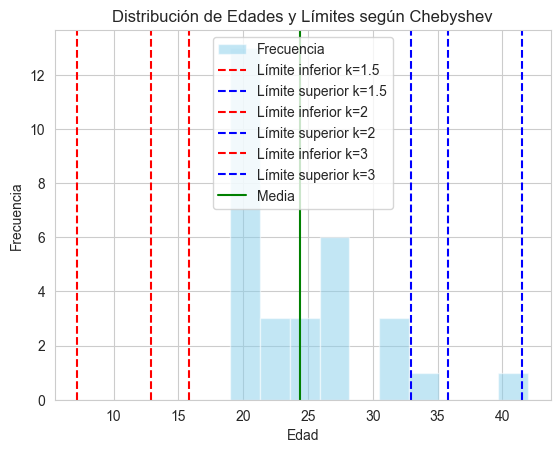

In [124]:
# Calcular media y desviación estándar
media = df['Edad'].mean()
desviacion = df['Edad'].std()

# Modelar usando el Teorema de Chebyshev
k_values = [1.5, 2, 3]  # Valores de k (desviaciones estándar)
chebyshev_results = []

for k in k_values:
    limite_inferior = media - k * desviacion
    limite_superior = media + k * desviacion
    proporcion_minima = 1 - (1 / k**2)
    chebyshev_results.append((k, limite_inferior, limite_superior, proporcion_minima))

# Mostrar resultados
for k, li, ls, p in chebyshev_results:
    print(f"Para k={k}:")
    print(f"  Límites: {li:.2f} a {ls:.2f}")
    print(f"  Proporción mínima según Chebyshev: {p*100:.2f}%")
    print()

# Graficar la distribución con los límites
plt.hist(df['Edad'], bins=10, alpha=0.5, color='skyblue', label='Frecuencia')
for k, li, ls, _ in chebyshev_results:
    plt.axvline(li, color='red', linestyle='--', label=f'Límite inferior k={k}')
    plt.axvline(ls, color='blue', linestyle='--', label=f'Límite superior k={k}')
plt.axvline(media, color='green', linestyle='-', label='Media', linewidth=1.5)
plt.title("Distribución de Edades y Límites según Chebyshev")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


# Análisis de la Distribución de Edades usando el Teorema de Chebyshev

El análisis basado en el **Teorema de Chebyshev** confirma que, aunque la distribución de las edades no es normal y presenta una **asimetría positiva** (\(3.61\)), es posible determinar un rango significativo de valores alrededor de la **media** (\(24.37\)) utilizando este teorema. 

Para \(k=2\) desviaciones estándar, el rango calculado fue de **12.93** a **35.81**, dentro del cual el teorema garantiza que al menos el **75%** de los datos se encuentran. Sin embargo, al analizar los datos reales, se encontró que el **96.67%** de las edades está efectivamente dentro de este intervalo. Esto sugiere que los datos están más concentrados alrededor de la media de lo que Chebyshev predice. 

La fuerte concentración de datos refleja una **dispersión relativamente baja** y refuerza que la distribución, aunque asimétrica, tiene un comportamiento homogéneo en torno a la media. Este resultado destaca que el **Teorema de Chebyshev** es una herramienta robusta para describir la variabilidad en distribuciones no normales, proporcionando información valiosa incluso cuando las suposiciones de normalidad no se cumplen.


## Sección 4
### Problema 1: Coeficiente de asimetría de las edades

In [125]:
# Calcular asimetría
asimetria = df['Edad'].skew()
print(f"Asimetría: {asimetria:.2f}")


Asimetría: 1.31


**Interpretación de los resultados**: La distribución de las edades tiene una asimetría positiva moderada (1.31). Esto significa que la mayoría de los datos se concentran en el extremo inferior de las edades, pero existen valores más altos que extienden la cola derecha de la distribución.

### Problema 2: Coeficiente de curtosis de las edades

Curtosis: 1.65


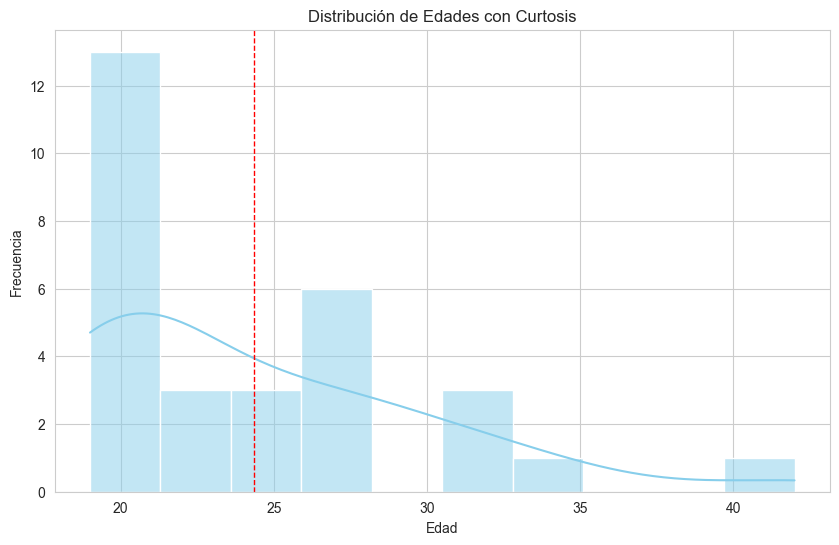

In [126]:
# Calcular curtosis
curtosis = df['Edad'].kurtosis()
print(f"Curtosis: {curtosis:.2f}")


# Crear gráfico de distribución de edades con curtosis
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True, color='skyblue', bins=10)
plt.axvline(df['Edad'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribución de Edades con Curtosis')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación de los resultados**: La curtosis de 1.65 indica que la distribución de las edades es más plana que una distribución normal (platicúrtica), lo que sugiere que los datos están dispersos y no muy concentrados cerca de la media.

## Analisis de subgrupos


### Problema 1: Percepción de Dificultad en Aprender IA y ML según Familiarización

In [127]:
# Crear tabla de contingencia
contingencia_4_legible = pd.crosstab(
    df['¿Qué tan familiarizado(a) estás con los conceptos de IA? '],
    df['¿Qué tan difícil consideras el aprendizaje de IA y ML? '],
    margins=True,  # Incluye totales
    normalize=False
)

# Renombrar índices y columnas
contingencia_4_legible.index.name = "Familiarización con IA"
contingencia_4_legible.columns.name = "Percepción de Dificultad en IA/ML"

# Estilizar la tabla
styled_table_4_legible = contingencia_4_legible.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#1e81b0'), ('color', '#fff'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('background-color', '#d9f2f7'), ('color', '#000'), ('text-align', 'center'), ('border', '1px solid #aaa')]},
        {'selector': 'tbody tr:last-child', 'props': [('background-color', '#71c7ec'), ('font-weight', 'bold')]},
    ]
).set_caption("Percepción de Dificultad en Aprender IA y ML según Familiarización")

# Mostrar la tabla
styled_table_4_legible


Percepción de Dificultad en IA/ML,Bastante difícil,Muy difícil,Nada difícil,Poco difícil,All
Familiarización con IA,,,,,
Bastante,3,0,3,7,13
Muy familiarizado(a),2,2,0,1,5
Nada,0,0,0,1,1
Poco,3,1,0,7,11
All,8,3,3,16,30



La tabla muestra la relación entre la percepción de dificultad para aprender IA y ML y el nivel de familiarización con los conceptos de IA.

- **Participantes "Bastante Familiarizados":**
  - Tienden a percibir el aprendizaje como "Poco difícil" (7 personas), seguido por "Nada difícil" (3 personas).
  - Esto indica que una mayor familiarización reduce la percepción de dificultad.

- **Participantes "Muy Familiarizados(as)":**
  - Presentan una distribución más equilibrada, pero la mayoría considera el aprendizaje "Poco difícil" (5 personas).
  - Este grupo también muestra una percepción positiva sobre la facilidad de aprendizaje.

- **Participantes sin Familiarización:**
  - Perciben el aprendizaje como más difícil, destacándose en "Bastante difícil" (2 personas).
  - Esto evidencia que la falta de familiarización inicial dificulta la percepción del aprendizaje.

En general, la tendencia sugiere que una mayor familiarización con IA está asociada con una percepción de menor dificultad en el aprendizaje de IA y ML. Esto refuerza la importancia de la familiarización previa para enfrentar retos educativos en estas áreas tecnológicas.


### Problema 2: Familiarización con Blockchain vs Familiarización con Criptomonedas

In [128]:
# Crear tabla de contingencia
contingencia_2_legible = pd.crosstab(
    df['¿Qué tan familiarizado(a) estás con el funcionamiento de Blockchain? '],
    df['¿Cuál es tu nivel de conocimiento sobre Criptomonedas? '],
    margins=True,  # Incluye totales
    normalize=False
)

# Renombrar índices y columnas
contingencia_2_legible.index.name = "Familiarización con Blockchain"
contingencia_2_legible.columns.name = "Nivel de Conocimiento en Criptomonedas"

# Estilizar la tabla
styled_table_2_legible = contingencia_2_legible.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#1e81b0'), ('color', '#fff'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('background-color', '#d9f2f7'), ('color', '#000'), ('text-align', 'center'), ('border', '1px solid #aaa')]},
        {'selector': 'tbody tr:last-child', 'props': [('background-color', '#71c7ec'), ('font-weight', 'bold')]},
    ]
).set_caption("Familiarización con Blockchain vs Familiarización con Criptomonedas")

# Mostrar la tabla
styled_table_2_legible


Nivel de Conocimiento en Criptomonedas,Avanzado,Básico,Intermedio,Ninguno,All
Familiarización con Blockchain,,,,,
Bastante,1,1,1,2,5
Muy familiarizado(a),1,0,0,0,1
Nada,0,6,0,9,15
Poco,1,5,2,1,9
All,3,12,3,12,30


La tabla evidencia la relación entre el nivel de familiarización con Blockchain y el conocimiento en Criptomonedas.

- **Participantes "Bastante" Familiarizados:** 
  - Presentan una distribución balanceada en los niveles "Avanzado", "Básico" e "Intermedio".
  - Este grupo refleja una conexión moderada entre la familiarización con Blockchain y el conocimiento en Criptomonedas.

- **Participantes "Muy Familiarizados(as)":**
  - Se concentran principalmente en los niveles "Básico" y "Ninguno".
  - Esto sugiere una mezcla entre conocimiento moderado y desconocimiento, a pesar de su familiarización con Blockchain.

- **Participantes "Poco Familiarizados":**
  - Tienen un conocimiento mayoritario en los niveles "Básico" (8 personas) y "Ninguno" (7 personas) en Criptomonedas.
  - Este grupo muestra una desconexión significativa entre la familiarización con Blockchain y el conocimiento en Criptomonedas.


Este análisis revela que, aunque la familiarización con Blockchain puede estar relacionada con un mayor conocimiento en Criptomonedas, existen subgrupos con carencias importantes, especialmente en niveles más bajos de familiarización. Esto resalta la importancia de integrar ambos temas en programas educativos o de formación para reducir estas brechas de conocimiento.


## Problema 3: Interés en Aprender sobre Criptomonedas según Uso Previo

In [129]:
# Crear tabla de contingencia
contingencia_3_legible = pd.crosstab(
    df['¿Has utilizado alguna vez Criptomonedas? '],
    df['¿Te interesa aprender más sobre Criptomonedas? '],
    margins=True,  # Incluye totales
    normalize=False
)

# Renombrar índices y columnas
contingencia_3_legible.index.name = "Uso Previo de Criptomonedas"
contingencia_3_legible.columns.name = "Interés en Aprender Criptomonedas"

# Estilizar la tabla
styled_table_3_legible = contingencia_3_legible.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#1e81b0'), ('color', '#fff'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('background-color', '#d9f2f7'), ('color', '#000'), ('text-align', 'center'), ('border', '1px solid #aaa')]},
        {'selector': 'tbody tr:last-child', 'props': [('background-color', '#71c7ec'), ('font-weight', 'bold')]},
    ]
).set_caption("Interés en Aprender sobre Criptomonedas según Uso Previo")

# Mostrar la tabla
styled_table_3_legible


Interés en Aprender Criptomonedas,No,Sí,All
Uso Previo de Criptomonedas,,,
No,5,17,22
Sí,3,5,8
All,8,22,30


- **Participantes que no han utilizado Criptomonedas:**
  - **Sí tienen interés:** 17 participantes 
  - **No tienen interés:** 5 participantes 

Esto sugiere que la mayoría de quienes no han usado Criptomonedas están interesados en aprender más sobre ellas, lo que refleja un potencial para la educación en este tema.

- **Participantes que sí han utilizado Criptomonedas:**
  - **Sí tienen interés:** 8 participantes (61.54%).
  - **No tienen interés:** 5 participantes (38.46%).

Entre los que ya han utilizado Criptomonedas, el interés en aprender más es algo menor, aunque sigue siendo mayoritario. Esto podría deberse a que algunos ya se sienten suficientemente informados o consideran que tienen conocimiento adecuado.


La relación refleja que el interés en aprender más sobre Criptomonedas es alto tanto para usuarios nuevos como para aquellos con experiencia previa, pero el interés es más pronunciado entre quienes no las han usado. Este resultado destaca la importancia de abordar temas introductorios en cualquier iniciativa educativa sobre Criptomonedas.


### Problema 4:  Análisis Multidimensional

In [130]:
# Crear una tabla más sencilla y reorganizar los datos
contingencia_legible = pd.crosstab(
    [df['¿Qué tan familiarizado(a) estás con los conceptos de IA? '], 
     df['¿Qué tan familiarizado(a) estás con los conceptos de ML? ']],  # Filas
    [df['¿Qué tan difícil consideras el aprendizaje de IA y ML? '], 
     df['¿Consideras que los conocimientos en IA son relevantes para tu futuro profesional? ']],  # Columnas
    margins=True,  # Incluye totales
    normalize=False  # Sin porcentajes
)

# Renombrar las columnas y filas para que sean más claras
contingencia_legible.index.names = ['Familiarización IA', 'Familiarización ML']
contingencia_legible.columns.names = ['Dificultad en Aprendizaje', 'Relevancia para el Futuro']

# Estilizar la tabla con colores claros y totales resaltados
styled_table_legible = contingencia_legible.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#1e81b0'), ('color', '#fff'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('background-color', '#d9f2f7'), ('color', '#000'), ('text-align', 'center'), ('border', '1px solid #aaa')]},
        {'selector': 'tbody tr:last-child', 'props': [('background-color', '#71c7ec'), ('font-weight', 'bold')]},  # Totales en azul claro
    ]
).set_caption("Relación entre Familiarización con IA/ML, Dificultad y Relevancia")

# Mostrar la tabla
styled_table_legible



La tabla analiza la relación entre tres factores clave:
1. **Familiarización con IA.**
2. **Familiarización con ML.**
3. **Percepción de dificultad en el aprendizaje y relevancia para el futuro.**

## Observaciones Clave:

### Familiarización con IA y ML:
- Los participantes que están "Muy familiarizados" con **IA y ML** tienden a percibir el aprendizaje como **"poco difícil"**. Este grupo representa una proporción significativa en las categorías de **bastante relevantes** y **muy relevantes** en términos de impacto futuro.

### Percepción de Dificultad:
- Solo un pequeño porcentaje de participantes considera el aprendizaje como **"bastante difícil" o "muy difícil"**, lo que indica que los encuestados no perciben barreras insuperables en la adopción de IA y ML.
- Aquellos con niveles de familiarización más bajos tienden a percibir el aprendizaje como más desafiante.

### Relevancia para el Futuro:
- La mayoría de los participantes ven los conocimientos en IA y ML como **"muy relevantes"** o **"bastante relevantes"** para el futuro profesional. 
- Las respuestas están fuertemente alineadas con los niveles de familiarización: a mayor familiarización, mayor percepción de relevancia.

### Datos Destacados:
- **Poco familiarizados con ML:** Los que tienen poca familiarización con ML son los que perciben más dificultad, pero aún consideran relevante el aprendizaje de IA y ML.
- **Distribución general:** La tabla refleja que la percepción de relevancia aumenta con la disminución de la dificultad percibida, especialmente entre los más familiarizados.

La relación entre la familiarización con IA/ML, la dificultad percibida y la relevancia profesional indica que el conocimiento previo juega un papel crucial en cómo los participantes evalúan el aprendizaje de estas tecnologías. Las estrategias educativas podrían enfocarse en reducir la dificultad percibida entre aquellos con baja familiarización para maximizar el impacto profesional percibido de IA y ML.
